Imports:

In [1]:
import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt

In [16]:
# crop an image to a specific size
# Taken from: https://stackoverflow.com/questions/44650888/resize-an-image-without-distortion-opencv
# Thanks to: Leonardo Mariga
def crop_square(img, size, interpolation=cv2.INTER_AREA):
    h, w = img.shape[:2]
    min_size = np.amin([h,w])
    # Centralize and crop
    crop_img = img[int(h/2-min_size/2):int(h/2+min_size/2), int(w/2-min_size/2):int(w/2+min_size/2)]
    resized = cv2.resize(crop_img, (size, size), interpolation=interpolation)
    return resized

# show image on new window
def si(image, window_name = "New Image"):
    cv2.imshow(window_name, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# show images side by side
def montage(images):
    for i in range(len(images)):
        if (len(images[i].shape) == 2):
            images[i] = cv2.cvtColor(images[i], cv2.COLOR_GRAY2BGR)
    montage_image = np.hstack(images)
    si(montage_image)

# apply mask on all image (bitwise)
def apply_mask(image, mask, window_name = "New Image"):
    mask_array = np.full(image.shape, mask, dtype="uint8")
    image = cv2.bitwise_and(image, mask_array)
    return image

# convert image from gray level to black and white, with invert, algorithm - by me :)
def black_and_white(image, invert = False):
    image_bw = copy.copy(image)
    const_invert_val = (invert*255)
    for i in range(len(image)):
        for j in range(len(image[0])):
            if (image[i][j] > 127):
                image_bw[i][j] = 255 - const_invert_val
            else:
                image_bw[i][j] = 0 + const_invert_val
    return image_bw

# shift all pixels in image to right
def apply_shift_right(image, amount = 1):
    new_image = np.full(image.shape, 0, dtype="uint8")
    for i in range(len(image)):
        for j in range(len(image[0])):
            new_image[i][j] = np.right_shift(image[i][j], amount)
    return new_image

# shift all pixels in image to left
def apply_shift_left(image, amount = 1):
    new_image = np.full(image.shape, 0, dtype="uint8")
    for i in range(len(image)):
        for j in range(len(image[0])):
            new_image[i][j] = np.left_shift(image[i][j], amount)
    return new_image

# enhance image visabillity with gamma transformation
def apply_image_enhancment_gamma_look_up_table(image, gamma = 2.5):
    LUT = np.array([pow(x/255, gamma)*255 for x in range(0, 256)], dtype="uint8")
    new_image = np.full(image.shape, 0, dtype="uint8")
    for i in range(len(image)):
        for j in range(len(image[0])):
            new_image[i][j] = LUT[image[i][j]]
    return new_image

# adds X value to all pixels in the image
def image_add(image, value):
    new_image = np.full(image.shape, 0, dtype="uint8")
    for i in range(len(image)):
        for j in range(len(image[0])):
            new_image[i][j] = min(image[i][j] + abs(value), 255)
    return new_image

# subtract X value from all pixels in the image
def image_sub(image, value):
    new_image = np.full(image.shape, 0, dtype="uint8")
    for i in range(len(image)):
        for j in range(len(image[0])):
            new_image[i][j] = max(image[i][j] - abs(value), 0)
    return new_image

# show images using matplotlib
def sip(images, titles=[], image_size=256):
    if len(images) != len(titles) and len(titles) != 0:
        raise Exception("Number of images does not match the number of titles.")
    if isinstance(images, np.ndarray):
        raise Exception("Images paramter must be passed as an array.")
    fig = plt.figure(figsize=(image_size * len(images) / 100, image_size * len(images) / 100), dpi=100)
    for i, image in enumerate(images):
        ax = fig.add_subplot(1, len(images), i + 1)
        if len(titles) != 0:
            ax.set_title(titles[i])
        ax.set_axis_off()
        ax.set_aspect('equal')
        if len(image.shape) == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            ax.imshow(image, interpolation='none')
        else:
            ax.imshow(image, interpolation='none', cmap='gray')
    plt.tight_layout()
    plt.show()

# show image pixels value histogram
def show_hist(image, title="Histogram"):
    if len(image.shape) == 3:
        raise Exception("Image should be in gray level.")
    hist = np.zeros(256, dtype='uint8')
    for i in range(len(image)):
        for j in range(len(image[0])):
            hist[image[i][j]] += 1
    plt.xlabel("Pixel value")
    plt.ylabel("Number of occurrences")
    plt.title(title)
    plt.bar(range(256), hist)
    plt.show()

# Made by ChatGPT, wth little edit by me
# Image histogram equalization is a technique used to enhance the contrast of an image by redistributing the intensity values.
def histogram_equalization(image):
    if len(image.shape) == 3: # Convert the image to grayscale if it's not already
        image = np.mean(image, axis=2).astype(np.uint8)
    hist, bins = np.histogram(image.flatten(), bins=256, range=(0, 256)) # Calculate histogram
    cdf = hist.cumsum() # Calculate cumulative distribution function (CDF)
    cdf_normalized = cdf * hist.max() / cdf.max() # Normalize CDF
    lut = np.interp(image.flatten(), bins[:-1], cdf_normalized) # Create a lookup table
    equalized_image = lut.reshape(image.shape).astype(np.uint8) # Apply lookup table to the image
    return equalized_image

In [3]:
# REMOVE LATER
image = cv2.imread("cropped_image.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Load the image, covert it to 256x256, and save it afterwards:

In [4]:
original_image = cv2.imread("MyImageJpg.jpg")
cropped_image = crop_square(img=original_image, size=256)
cv2.imwrite("cropped_image.jpg", cropped_image)

True

Load the image and show it:

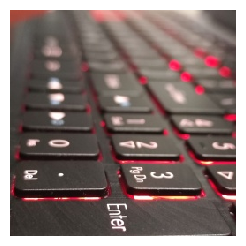

In [5]:
image = cv2.imread("cropped_image.jpg")
sip([image])

Converting the image to gray level and showing it besides the colored image:

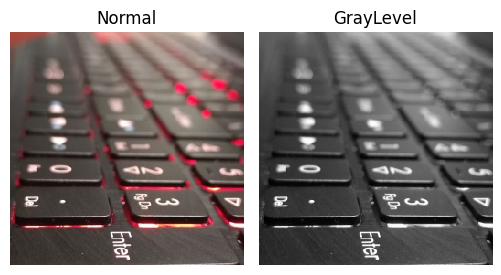

In [6]:
# convert image to gray level
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sip([image, image_gray], ["Normal", "GrayLevel"])

Create image in Black & White (From the gray level image)

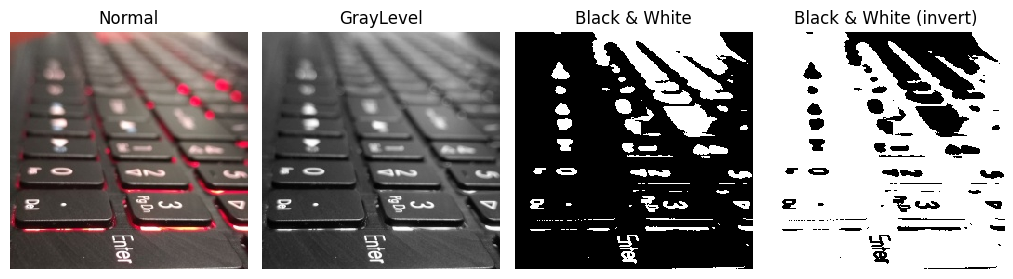

In [7]:
img_bw = black_and_white(image = image_gray, invert=False)
img_bw_invert = black_and_white(image = image_gray, invert=True)
sip([image, image_gray, img_bw, img_bw_invert], ["Normal", "GrayLevel", "Black & White", "Black & White (invert)"])

Apply masks (bitwise):

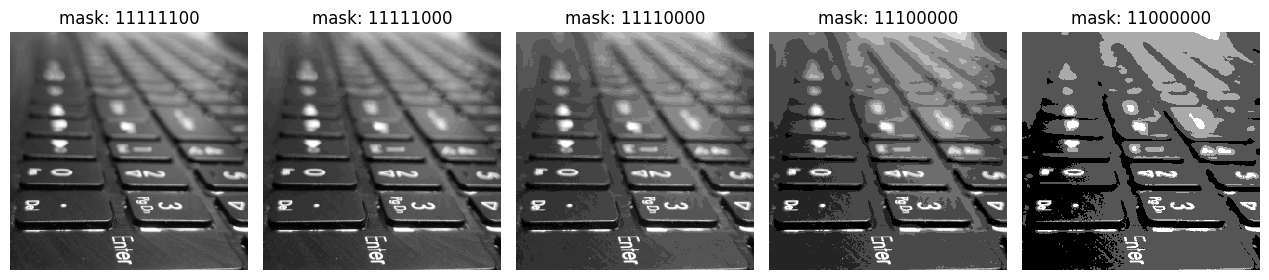

In [8]:
#apply_mask(image_gray, mask=0b11111000)
img0 = apply_mask(image_gray, mask=0b11111100)
img1 = apply_mask(image_gray, mask=0b11111000)
img2 = apply_mask(image_gray, mask=0b11110000)
img3 = apply_mask(image_gray, mask=0b11100000)
img4 = apply_mask(image_gray, mask=0b11000000)
#montage([img0, img1, img2, img3, img4])
sip([img0, img1, img2, img3, img4], ["mask: 11111100", "mask: 11111000", "mask: 11110000", "mask: 11100000", "mask: 11000000"])

Apply shift left and right:

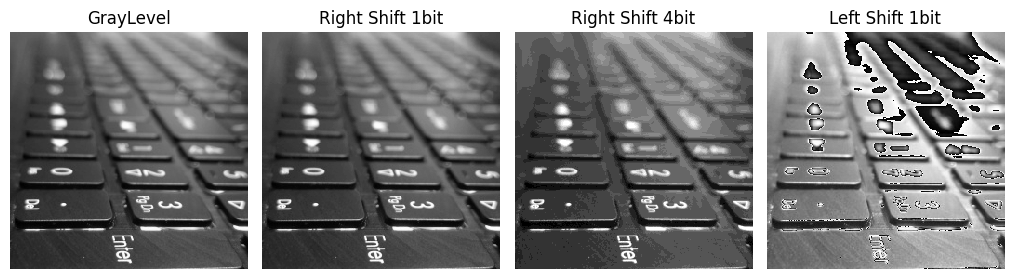

In [9]:
img_shift_left = apply_shift_left(image_gray, 1)
img_shift_right = apply_shift_right(image_gray, 1)
img_shift_right_3 = apply_shift_right(image_gray, 4) # we can see the image is visually starting to change only after shifting the 3 times right (removing 3 LSB bits)
sip([image_gray, img_shift_right, img_shift_right_3, img_shift_left], ["GrayLevel", "Right Shift 1bit", "Right Shift 4bit", "Left Shift 1bit"])

Apply image enhancement, using gamma transformation and a look-up-table for efficiency:

<ins>*Note:</ins> We add +1 to all the pixels, because 0 value pixels causes problems (due to the equation we used in the gamma enhancement algorithm)

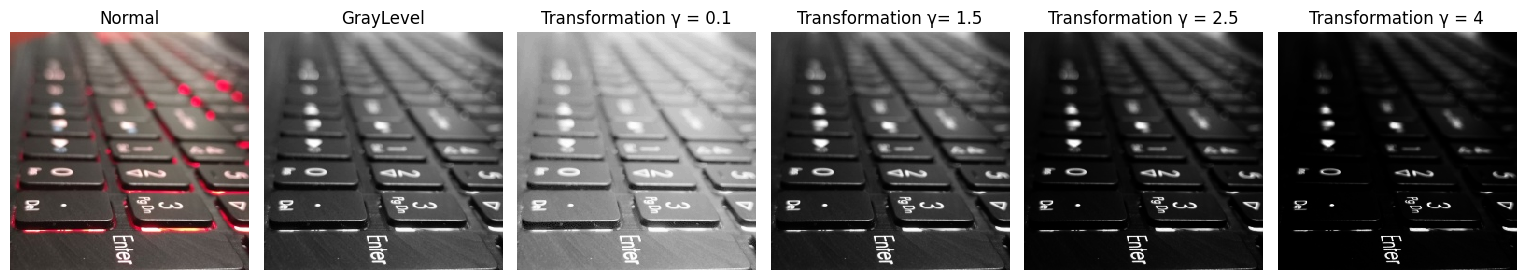

In [10]:
sip([
    image,
    image_gray,
    apply_image_enhancment_gamma_look_up_table(image = image_add(image_gray, 1), gamma = 0.1),
    apply_image_enhancment_gamma_look_up_table(image = image_add(image_gray, 1), gamma = 1.5),
    apply_image_enhancment_gamma_look_up_table(image = image_add(image_gray, 1), gamma = 2.5),
    apply_image_enhancment_gamma_look_up_table(image = image_add(image_gray, 1), gamma = 4)
    ],
    [
     "Normal",
     "GrayLevel",
     "Transformation γ = 0.1",
     "Transformation γ= 1.5",
     "Transformation γ = 2.5",
     "Transformation γ = 4"]
    )

Show for every pixel the value/count histogram:<br>
(for each pixel value, show how many times it has appeared in the image)

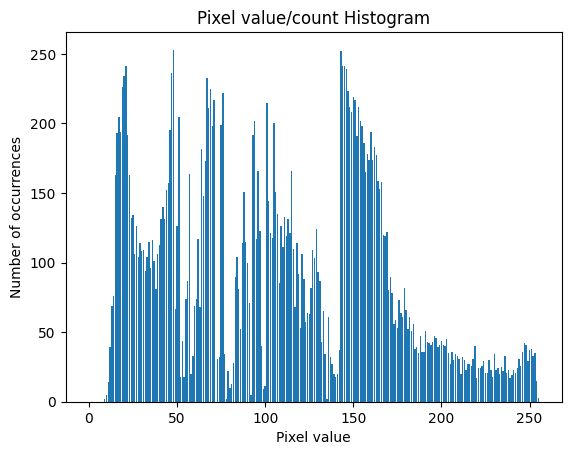

In [11]:
show_hist(image_gray, "Pixel value/count Histogram")

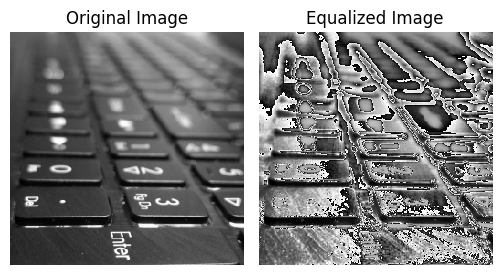

In [17]:
equalized_image = histogram_equalization(image)
sip([image_gray, equalized_image], ["Original Image", "Equalized Image"])